* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 37

---
---

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score

In [167]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [168]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Gunakan `Pclass`, `Age`, `SibSp`, `Parch`, `Fare` sebagai variabel independen

### Gunakan `Survived` sebagai variabel dependen

In [169]:
independen = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare']]
dependen = titanic.survived

### **Isi Missing Value Jika Ada**

In [170]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Checking Data Posistion**

In [171]:
titanic.describe(include='all') 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


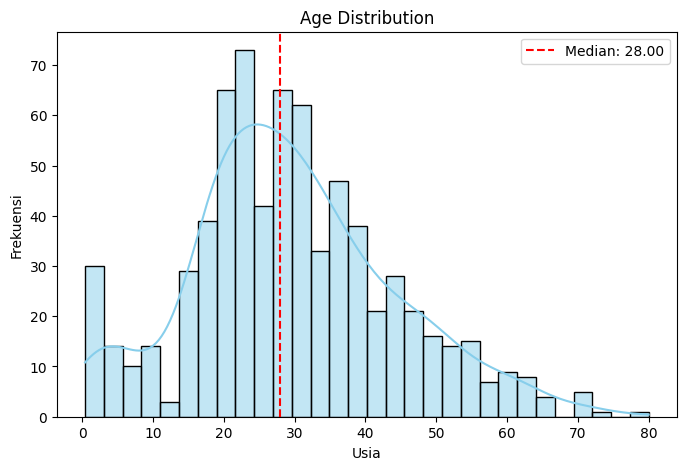

In [172]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic['age'], bins=30, kde=True, color='skyblue')

plt.axvline(x=titanic['age'].median(), color='red', linestyle='dashed', label=f'Median: {titanic["age"].median():.2f}')
plt.legend()
plt.title(f"Age Distribution")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()


### **Handling Missing Value --> Data Imputation**

* `Age`(Numeric) --> Pada saat cek distribusi data ternyata Age terjadi Positive Skewed (tidak normal) dengan rata-rata diatas median, maka dari itu akan dilakukan imputasi data pada Age dengan menggunakan **nilai median nya**
* `Deck`(Kategorikal) --> Terlihat bahwa jumlah missing pada deck sekitar 300% (688), maka untuk mengatasi nya akan dilakukan imputasi data dengan menambah dengan kategori baru dengan **'Unknown'**
* `Embark Town` (Kategorikal) --> Missing value pada embark town sangat kecil , maka dapat diatasi dengan melakukan imputasi data menggunakan **nilai mode pada kategori tersebut**
* `Embarked` (Kategorikal) --> Missing value pada embark town sangat kecil , maka dapat diatasi dengan melakukan imputasi data menggunakan **nilai mode pada kategori tersebut**

In [173]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [174]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')  
titanic['deck'].fillna('Unknown', inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

### **Analisa korelasi antara independen dan dependen variabel**

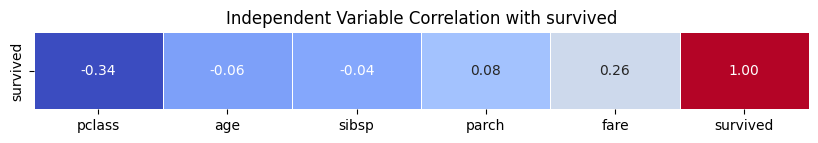

In [175]:
selected_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']

correlation_matrix = titanic[selected_columns].corr()

price_correlation = correlation_matrix[['survived']].T

plt.figure(figsize=(10, 1))
sns.heatmap(price_correlation, annot=True, cbar=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Independent Variable Correlation with survived")
plt.show()

### **Interpretasi hasil korelasi**

* `pclass` --> menunjukkan korelasi negatif sedang (-0.34) antara pclass (kelas tiket penumpang) dengan survived. Ini berarti semakin rendah kelas tiket (kelas 1), semakin tinggi kemungkinan untuk selamat. Sebaliknya, penumpang dengan kelas lebih rendah (kelas 3) memiliki peluang selamat yang lebih kecil.
* `age` --> menunjukkan korelasi negatif yang sangat lemah (-0.06) dengan survived, yang berarti usia tidak terlalu berpengaruh terhadap peluang keselamatan penumpang.
* `sibsp` --> menunjukkan korelasi negatif sangat lemah (-0.04), artinya jumlah saudara atau pasangan dalam kapal tidak memiliki dampak signifikan terhadap kemungkinan selamat.
* `parch` --> menunjukkan korelasi positif sangat lemah (0.08), artinya jumlah orang tua atau anak dalam kapal juga tidak terlalu mempengaruhi kemungkinan selamat.
* `fare` --> Korelasi positif sedang (0.26), menunjukkan bahwa semakin tinggi harga tiket yang dibayar, semakin besar kemungkinan untuk selamat. Ini sejalan dengan hubungan antara fare dan pclass, karena tiket kelas 1 lebih mahal dan memiliki tingkat keselamatan yang lebih tinggi.

`Kesimpulan` : **Keselamatan penumpang Titanic terutama dipengaruhi oleh kelas tiket (pclass) dan harga tiket (fare)**, di mana penumpang kelas lebih tinggi yang juga pasti membayar lebih mahal memiliki peluang selamat lebih besar, sementara faktor usia, jumlah saudara, dan jumlah keluarga memiliki pengaruh yang lemah.

### **Split data menjadi Train dan Test set dengan Proporsi 80 : 20 dan random state 42**

In [176]:
x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = titanic.survived

In [177]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

### **Lakukan Klasifikasi dengan KNN**

In [178]:
# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [179]:
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy:.4f}')

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.7921
Test Accuracy: 0.5922


### **Lakukan Scalling pada fitur**

In [180]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Lakukan Klasifikasi pada Fitur yg telah di Scalling**

In [181]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [182]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {test_accuracy:.4f}')

Accuracy: 0.6145


### **Bandingkan Evaluasi antara Train dan Test**

In [183]:
print("Evaluasi pada data train:")
print(classification_report(y_train, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

print("\nEvaluasi pada data test:")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Evaluasi pada data train:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.71      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712

Train Accuracy: 0.8089887640449438

Evaluasi pada data test:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       110
           1       0.50      0.46      0.48        69

    accuracy                           0.61       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.61      0.61       179

Test Accuracy: 0.6145251396648045


### **Lakukan Manual Tuning untuk mencari Nilai K (tetangga) Paling optimum**

In [184]:
accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_test_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_test_pred))

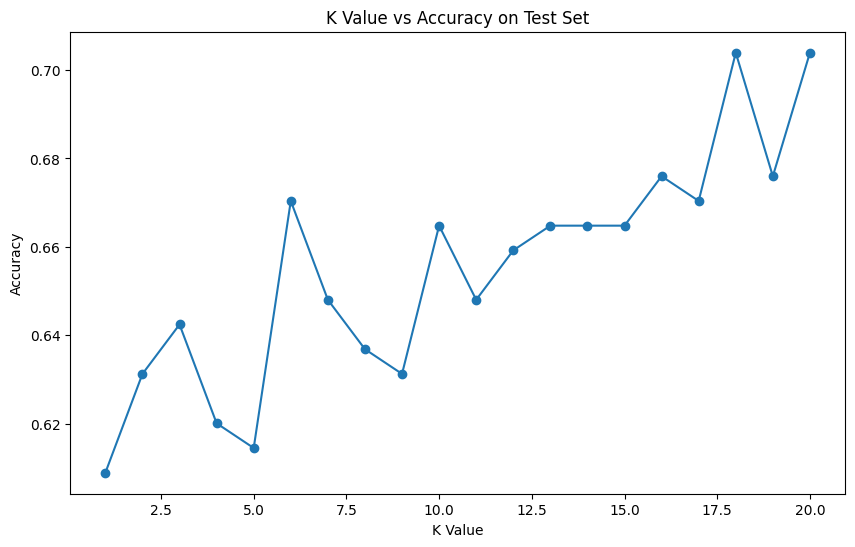

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy on Test Set')
plt.show()

In [186]:
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Nilai K Optimal: {optimal_k}")

Nilai K Optimal: 18


### **Lakukan Klasifikasi dan Evaluasi dengan Tetangga optimum tersebut**

In [187]:
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18)

In [188]:
y_train_pred_optimal = knn_optimal.predict(X_train_scaled)
y_test_pred_optimal = knn_optimal.predict(X_test_scaled)

In [189]:
train_accuracy = accuracy_score(y_train, y_train_pred_optimal)
print("Train set evaluation with optimal K:")
print(f"Accuracy: {train_accuracy}")
print(classification_report(y_train, y_train_pred_optimal))


test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
print("\nTest set evaluation with optimal K:")
print(f"Accuracy: {test_accuracy}")
print(classification_report(y_test, y_test_pred_optimal))

Train set evaluation with optimal K:
Accuracy: 0.7514044943820225
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       439
           1       0.79      0.48      0.60       273

    accuracy                           0.75       712
   macro avg       0.76      0.70      0.71       712
weighted avg       0.76      0.75      0.74       712


Test set evaluation with optimal K:
Accuracy: 0.7039106145251397
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       110
           1       0.67      0.46      0.55        69

    accuracy                           0.70       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.70      0.70      0.69       179



### **Buat Kesimpulan berdasarkan Evaluasi Model**

* Tanpa Preprocessing model memiliki performa yang cukup signifikan pada train dan test tetapi kurang generalisasi pada test. **Perbedaan akurasi yang cukup besar dimana lebih besar pada data train ~20% mengindikasikan potensi overfitting**.
* **Scaling meningkatkan akurasi pada train dan test**. Hal ini menunjukkan bahwa normalisasi data membantu model memahami distribusi fitur dengan lebih baik.
* **Tuning KNN Manual memberikan akurasi pada data uji meningkat secara signifikan**. Hal ini menunjukkan bahwa tuning K berhasil mengurangi overfitting dan meningkatkan kemampuan model dalam melakukan generalisasi pada kedua dataset (train dan test).

📌 `Kesimpulan Akhir`: Setelah dilakukan scaling dan tuning manual, performa model KNN meningkat dengan lebih baik. Pemilihan K optimal (K=18) berhasil meningkatkan akurasi data uji dari 0.5922 menjadi 0.7039, menunjukkan bahwa tuning  membantu model lebih generalisasi pada kedua dataset. 